In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, date
plt.style.use('ggplot')

In [2]:
# Tải lên dữ liệu Transactions từ file excel

trans = pd.read_excel('Raw_data.xlsx', sheet_name='Transactions')

In [3]:
# Kiểm tra 5 bản ghi đầu tiên từ dữ liệu Transactions

trans.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [5]:
# Thông tin về các cột và kiểu dữ liệu của dữ liệu Transactions

trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

Từ thông tin trên ta thấy tất cả các kiểu dữ liệu của các cột đều ôn, nên chúng ta không cần phải sửa đổi bất cứ điều gì.

## Tổng số bản ghi

In [6]:
# Tổng số hàng và cột trong tập dữ liệu

print('Total records (row) in the dataset: {}'.format(trans.shape[0]))
print('Total columns in the dataset: {}'.format(trans.shape[1]))

Total records (row) in the dataset: 20000
Total columns in the dataset: 13


## Các cột số và các cột không phải số

In [7]:
# Lấy ra các cột sô
df_numeric = trans.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print("The numeric columns are :")
print(numeric_cols)

# Lấy ra các cột không phải số
df_non_numeric = trans.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print("The non-numeric columns are :")
print(non_numeric_cols)

The numeric columns are :
['transaction_id' 'product_id' 'customer_id' 'online_order' 'list_price'
 'standard_cost' 'product_first_sold_date']
The non-numeric columns are :
['transaction_date' 'order_status' 'brand' 'product_line' 'product_class'
 'product_size']


## 1. Kiểm tra giá trị bị thiếu

Kiểm tra xem tập dữ liệu có tồn tại bất kỳ giá trị thiếu nào không. Nếu giá trị thiếu xuất hiện cho một cột cụ thể, tùy thuộc vào tình huống thì: 
- Cột đó có thể bị loại bỏ (trong trường hợp một số lượng lớn dữ liệu bị thiếu) 
- Có thể loại bỏ giá trị thiếu đó (trong trường hợp một số lượng ít dữ liệu bị thiếu)
- Một giá trị phù hợp sẽ được điền vào cột có giá trị thiếu

In [8]:
# Tổng số giá trị bị thiếu

trans.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [9]:
# Tỉ lệ phần trăm giá trị bị thiếu

trans.isnull().mean()*100

transaction_id             0.000
product_id                 0.000
customer_id                0.000
transaction_date           0.000
online_order               1.800
order_status               0.000
brand                      0.985
product_line               0.985
product_class              0.985
product_size               0.985
list_price                 0.000
standard_cost              0.985
product_first_sold_date    0.985
dtype: float64

Sau khi thực hiện kiểm tra ở trên chúng ta thấy có các cột như: <b>online_order, brand, product_line, product_class, product_size, standard_cost, product_first_sold_date</b> có giá trị null.

### 1.1. Cột Online Order

<b>Vì cột dữ liệu online_order chỉ có 1.8% số bản ghi bị thiếu, nên chúng ta có thể thực hiện điền các giá trị mode(phổ biến nhất) cho cột phân loại này.</b>

In [10]:
# Lấy ra các bản ghi có giá trị null trong cột online_order

trans[trans['online_order'].isnull()]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
97,98,49,333,2017-06-23,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,37823.0
166,167,90,3177,2017-04-26,NaN,Approved,Norco Bicycles,Standard,low,medium,363.01,290.41,38482.0
169,170,6,404,2017-10-16,NaN,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,37838.0
250,251,63,1967,2017-04-11,NaN,Approved,Solex,Standard,medium,medium,1483.20,99.59,42145.0
300,301,78,2530,2017-03-24,NaN,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,35455.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19514,19515,51,690,2017-01-22,NaN,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19573,19574,18,1735,2017-01-15,NaN,Approved,Solex,Standard,medium,medium,575.27,431.45,41345.0
19580,19581,49,1933,2017-10-12,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,41064.0
19635,19636,98,1389,2017-07-26,NaN,Approved,Trek Bicycles,Standard,high,medium,358.39,215.03,38002.0


In [11]:
# Giá trị mode của cột online_order
most_freq_online_mode = trans['online_order'].mode()
most_freq_online_mode

0    1.0
Name: online_order, dtype: float64

<b>Vì giá trị 1 là giá trị phổ biến nhất của cột 'online_order'. Chúng ta sẽ thực hiện việc điền giá trị mode vào giá trị bị thiếu của cột phân loại này.</b>

In [12]:
# Điền giá trị mode vào
trans['online_order'] = trans.loc[:, 'online_order'].fillna(1)

In [13]:
# Kiểm tra trong cột 'online_order' còn xuất hiện giá trị null không
trans['online_order'].isnull().sum()

0

Bây giờ cột 'online_order' không còn giá trị null nữa

### 1.2. Cột: brand, product_line, product_class, product_size, standard_cost, product_first_sold_date

Quan sát trong tập dữ liệu, chúng ta nhận thấy rằng khi cột <b>'brand'</b> có giá trị null thì tất cả các giá trị khác trong các cột có giá trị thiếu như <b>'product_line', 'product_class', 'product_size', 'standard_cost', 'product_first_sold_date'</b> cũng đều là null. <b>Ngoài ra, các giá trị null này chiếm 1% của tập dữ liệu. Do đó, chúng ta có thể loại bỏ các bản ghi này.</b>

In [14]:
trans[trans['brand'].isnull()][['brand', 'product_line', 'product_class', 'product_size',
                               'standard_cost', 'product_first_sold_date']].drop_duplicates()

,brand,product_line,product_class,product_size,standard_cost,product_first_sold_date
136,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Kiểm tra có bao nhiêu hàng

trans[trans['brand'].isnull()][['brand', 'product_line', 'product_class', 'product_size',
                               'standard_cost', 'product_first_sold_date']].shape[0]

197

In [16]:
# Lọc ra các chỉ mục ứng với các hàng đó

records_to_drop = trans[trans['brand'].isnull()][['brand', 'product_line', 'product_class', 'product_size',
                               'standard_cost', 'product_first_sold_date']].index
records_to_drop

Index([  136,   159,   366,   406,   676,   780,  1003,  1130,  1196,  1282,
       ...
       19045, 19132, 19176, 19196, 19205, 19340, 19383, 19793, 19859, 19871],
      dtype='int64', length=197)

In [17]:
# Loại bỏ các hàng tương ứng với chỉ mục trên

trans.drop(index=records_to_drop, axis=0, inplace=True)

<b>Bây giờ chúng ta không còn bất kỳ giá trị thiếu nào trong tập dữ liệu Transaction nữa</b>

In [18]:
# Kiểm tra lại còn có bất kỳ giá trị thiếu nào trong tập dữ liệu

trans.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [19]:
# Tổng số bản ghi sau khi loại bỏ các giá trị thiếu

print('Total records after removing Missing Values: {}'.format(trans.shape[0]))

Total records after removing Missing Values: 19803


## 2. Tạo một cột mới chứa giá trị lợi nhuận "Profit"

<b>Cột Lợi nhuận sẽ là sự khác biệt giữa giá niêm yết và giá tiêu chuẩn của một sản phẩm.</b>

In [20]:
trans['Profit'] = trans['list_price'] - trans['standard_cost']

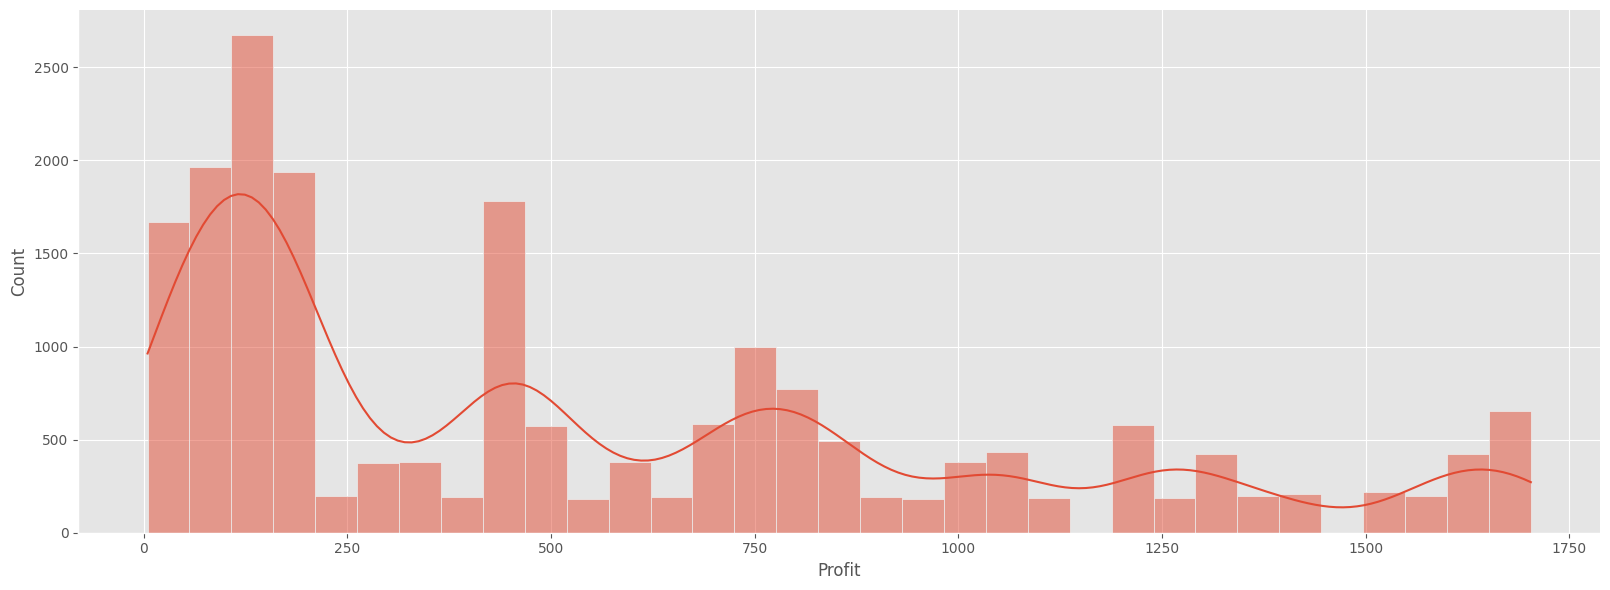

In [21]:
# Biểu đồ phân phối của cột Profit
sns.displot(data=trans['Profit'], kde=True, height=6, aspect=2.7)

<b>Dựa vào biểu đồ, ta thấy: Cột cao nhất ở gần đầu đồ thị cho thấy rằng các khoảng lợi nhuận thấp xuất hiện nhiều hơn so với các khoảng lợi nhuận cao hơn. Điều này có thể cho thấy rằng phần lớn các giao dịch mang lại lợi nhuận thấp.</b>

## 3. Kiểm tra tính không nhất quán trong dữ liệu

Chúng ta sẽ kiểm tra xem liệu có dữ liệu không nhất quán/dữ liệu gõ sai trong các cột phân loại hay không. Các cột cần được kiểm tra là: <b>'online_order', 'order_status', 'product_line', 'product_class', 'product_size' và 'brand'.</b>

### 3.1. Cột online_order

Không có <b>dữ liệu không nhất quán</b> trong cột <b>online_order</b>

In [22]:
trans['online_order'].value_counts().reset_index()

,online_order,count
0,1.0,10097
1,0.0,9706


### 3.2. Cột order_status

Không có <b>dữ liệu không nhất quán</b> trong cột <b>order_status</b>

In [23]:
trans['order_status'].value_counts()

order_status
Approved     19625
Cancelled      178
Name: count, dtype: int64

In [24]:
trans[['order_status', 'online_order']].drop_duplicates()

,order_status,online_order
0,Approved,0.0
1,Approved,1.0
42,Cancelled,0.0
254,Cancelled,1.0


### 3.3. Cột product_line

Không có <b>dữ liệu không nhất quán</b> trong cột <b>product_line</b>

In [25]:
trans['product_line'].value_counts()

product_line
Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: count, dtype: int64

### 3.4. Cột product_class

Không có <b>dữ liệu không nhất quán</b> trong cột <b>product_class</b>

In [26]:
trans['product_class'].value_counts()

product_class
medium    13826
high       3013
low        2964
Name: count, dtype: int64

### 3.5. Cột product_size

Không có <b>dữ liệu không nhất quán</b> trong cột <b>product_size</b>

In [27]:
trans['product_size'].value_counts()

product_size
medium    12990
large      3976
small      2837
Name: count, dtype: int64

### 3.6. Cột brand

Không có <b>dữ liệu không nhất quán</b> trong cột <b>brand</b>

In [28]:
trans['brand'].value_counts()

brand
Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: count, dtype: int64

## 4. Kiểm tra trùng lặp

Chúng ta cần đảm bảo rằng không có sự trùng lặp của bản ghi trong tập dữ liệu. Điều này có thể dẫn đến lỗi trong phân tích dữ liệu do chất lượng dữ liệu kém. Nếu có các hàng dữ liệu trùng lặp, chúng ta cần loại bỏ những bản ghi đó.</br>
Để kiểm tra sự trùng lặp của các bản ghi, trước tiên chúng ta cần loại bỏ cột khóa chính của tập dữ liệu, sau đó áp dụng hàm drop_duplicates() được cung cấp bởi Python.

In [29]:
trans_dedupped = trans.drop('transaction_id', axis=1).drop_duplicates()

print('Number of records after removing customer_id (pk), duplicates: {}'.format(trans_dedupped.shape[0]))
print('Number of records in original dataset: {}'.format(trans.shape[0]))

Number of records after removing customer_id (pk), duplicates: 19803
Number of records in original dataset: 19803


<b>Vì cả hai giá trị đều giống nhau, nên không có bản ghi trùng lặp trong tập dữ liệu.</b>

## 5. Xuất tập dữ liệu Transactions đã được làm sạch sang định dạng csv

Tập dữ liệu Transactions đã được làm sạch. Do đó, chúng ta có thể xuất dữ liệu sang định dạng CSV để tiếp tục phân tích dữ liệu của phân khúc khách hàng bằng cách kết hợp nó với các bảng khác.

In [30]:
trans.to_csv('Transactions_Cleaned.csv', index=False)